Case study for K-means and Hierachical Clustering: This code is developed on heart dataset from UCI to show the application of 
Clustering Algorithm in scenerio of no labelling in data space. Here we have dropped the target class and predicted target by clustering/segmenting the few features. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
hd = pd.read_csv("heart.csv")

In [3]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age: age in years

sex: (1 = male; 0 = female)

cp: chest pain type

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg:  resting electrocardiographic results

thalach:  maximum heart rate achieved

exang:  exercise induced angina (1 = yes; 0 = no)

oldpeak:  ST depression induced by exercise relative to rest

slope:  the slope of the peak exercise ST segment

ca:   number of major vessels (0-3) colored by flourosopy

thal:   3 = normal; 6 = fixed defect; 7 = reversable defect

target1 or 0

In [5]:
hd["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
# clustering do not need labels. Identify the labels using Clustering methods 

hd_WithoutLabels = hd.drop(["target"], axis = 1)
hd_WithoutLabels.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
hd_WithoutLabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


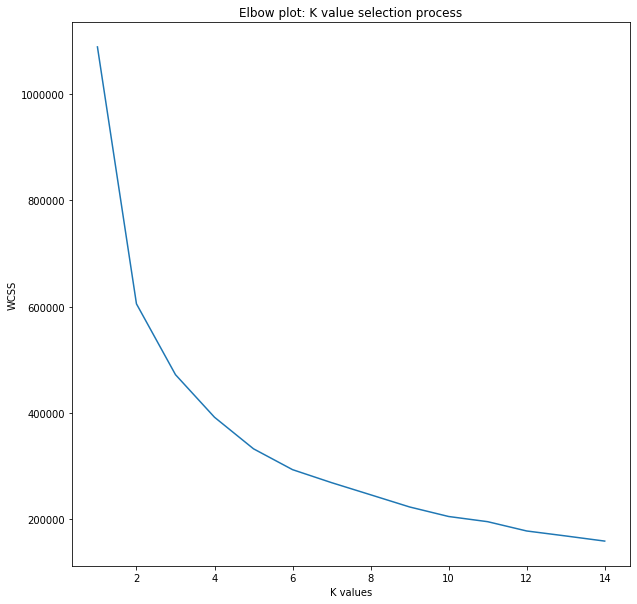

In [8]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(hd_WithoutLabels)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.title('Elbow plot: K value selection process')
plt.xlabel("K values")
plt.ylabel("WCSS")
plt.show()

In [9]:
#Elbow point starting from 2 

dataWithoutLabels = hd.loc[:,['trestbps','chol']]
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(dataWithoutLabels)
dataWithoutLabels["type"] = clusters
dataWithoutLabels["type"].unique()

array([1, 0], dtype=int64)

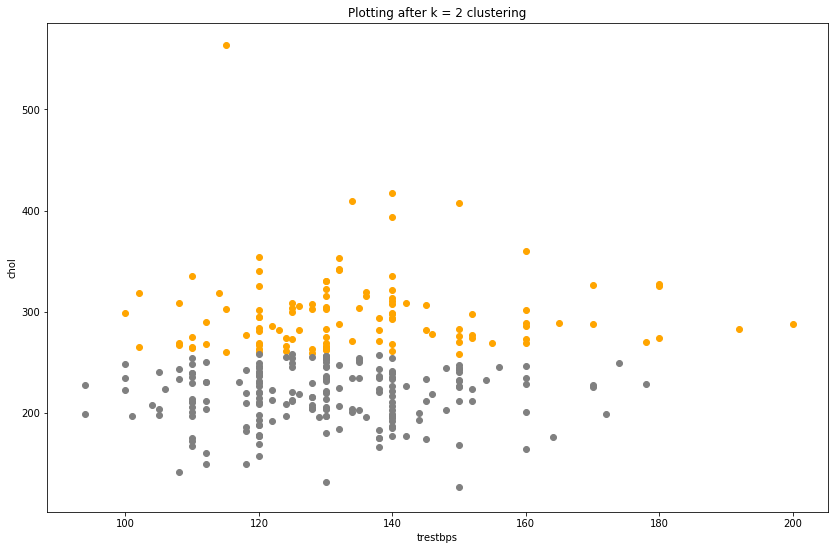

In [10]:
plt.figure(figsize = (14, 9))
plt.scatter(dataWithoutLabels["trestbps"][dataWithoutLabels["type"] == 0], dataWithoutLabels["chol"][dataWithoutLabels["type"] == 0], color = "orange")
plt.scatter(dataWithoutLabels["trestbps"][dataWithoutLabels["type"] == 1], dataWithoutLabels["chol"][dataWithoutLabels["type"] == 1], color = "gray")
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.title('Plotting after k = 2 clustering')
plt.show()

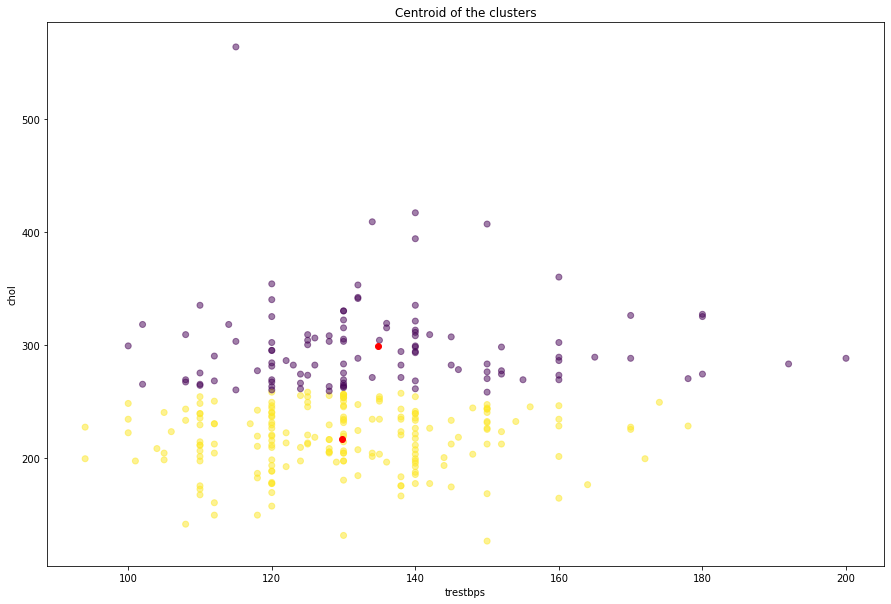

In [11]:
plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["trestbps"], dataWithoutLabels["chol"], c = clusters, alpha = 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "red", alpha = 1)
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.title('Centroid of the clusters')
plt.show()

In [13]:
dataWithoutDiagnosis = hd.drop(["target"], axis = 1)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe_hd = make_pipeline(scalar, kmeans)
pipe_hd.fit(dataWithoutDiagnosis)
labels = pipe_hd.predict(dataWithoutDiagnosis)
hd1 = pd.DataFrame({'labels': labels, "target" : hd['target']})
cross_tab = pd.crosstab(hd1['labels'], hd1['target'])
print(cross_tab)

target   0    1
labels         
0       93   12
1       45  153


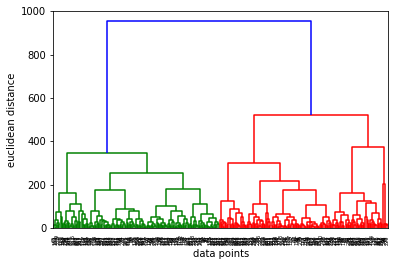

In [14]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(hd_WithoutLabels, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(hd_WithoutLabels)
hd_WithoutLabels["label"] = cluster
hd_WithoutLabels.label.value_counts()

0    153
1    150
Name: label, dtype: int64

In [22]:
dataWithoutTarget = hd.drop(["target"], axis = 1)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
pipe_hc = make_pipeline(scalar, hc)
labels = pipe_hc.fit_predict(dataWithoutTarget)
df = pd.DataFrame({'labels': labels, "target" : hd['target']})
cross_tab = pd.crosstab(df['labels'], df['target'])
print(cross_tab)

target   0    1
labels         
0       57  146
1       81   19


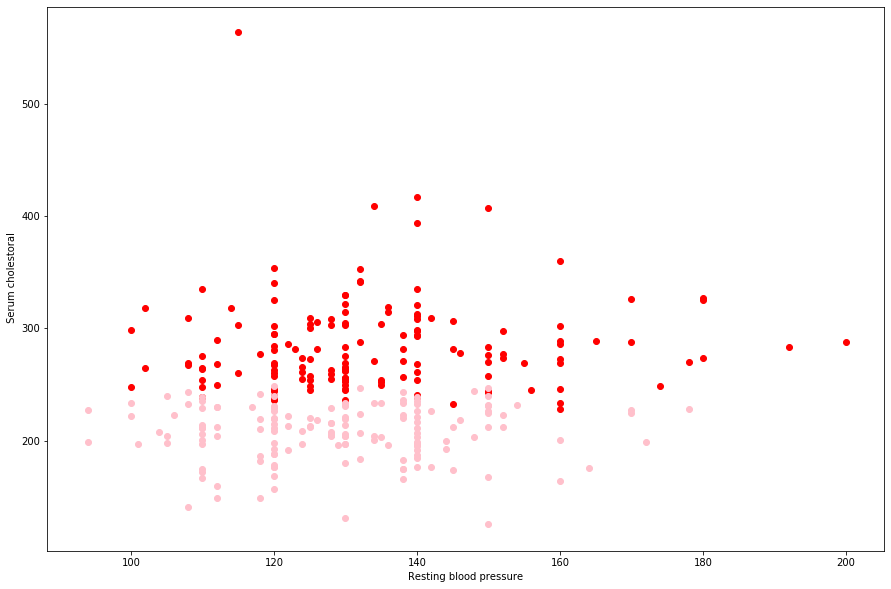

In [20]:
plt.figure(figsize = (15, 10))
plt.scatter(hd_WithoutLabels["trestbps"][hd_WithoutLabels.label == 0], hd_WithoutLabels["chol"][hd_WithoutLabels.label == 0], color = "red")
plt.scatter(hd_WithoutLabels["trestbps"][hd_WithoutLabels.label == 1], hd_WithoutLabels["chol"][hd_WithoutLabels.label == 1], color = "pink")
plt.xlabel("Resting blood pressure")
plt.ylabel(" Serum cholestoral")
plt.show()